In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import math,time,random,datetime

import numpy as np
import pandas as pd

import seaborn as sns

import missingno

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier


In [7]:
train = pd.read_csv('titanic/train.csv')

In [8]:
test = pd.read_csv('titanic/test.csv')
gender = pd.read_csv('titanic/gender_submission.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
len(train)

891

In [13]:
len(test)

418

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


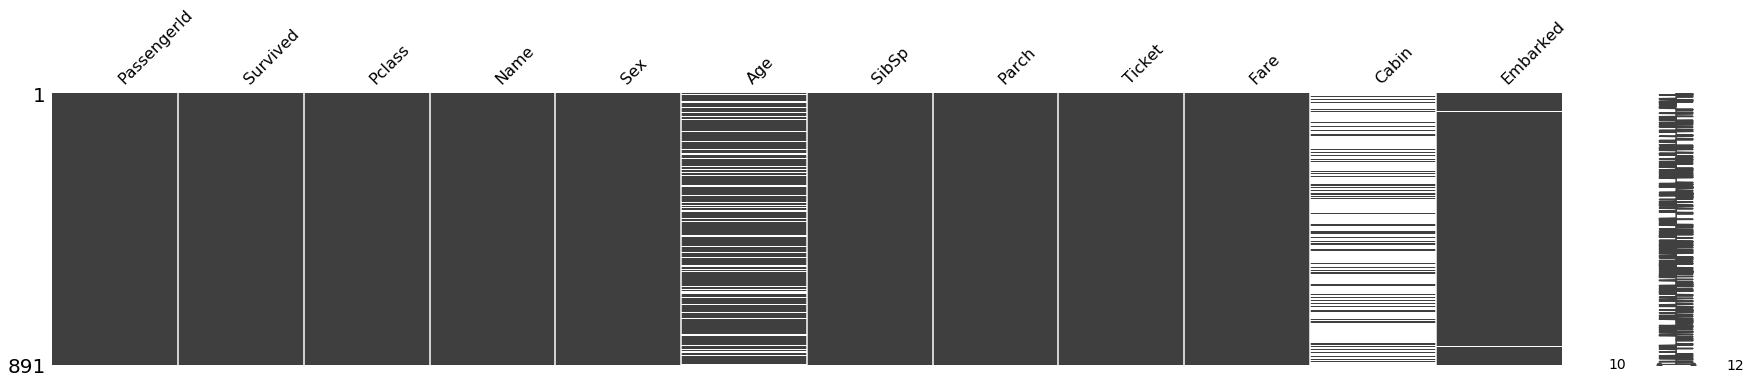

In [15]:
missingno.matrix(train,figsize=(30,5))

In [16]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


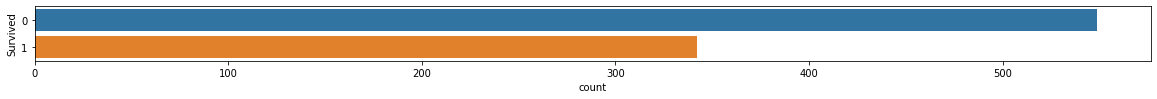

In [19]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

In [20]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [21]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


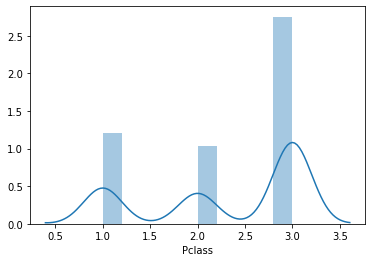

In [23]:
sns.distplot(train.Pclass)

In [24]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

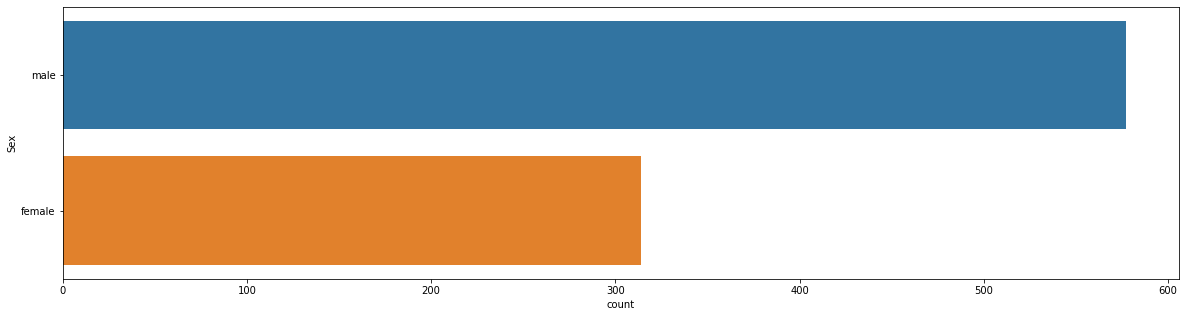

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sex',data=train)

In [31]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female',1,0)
df_con['Sex'] = train['Sex']

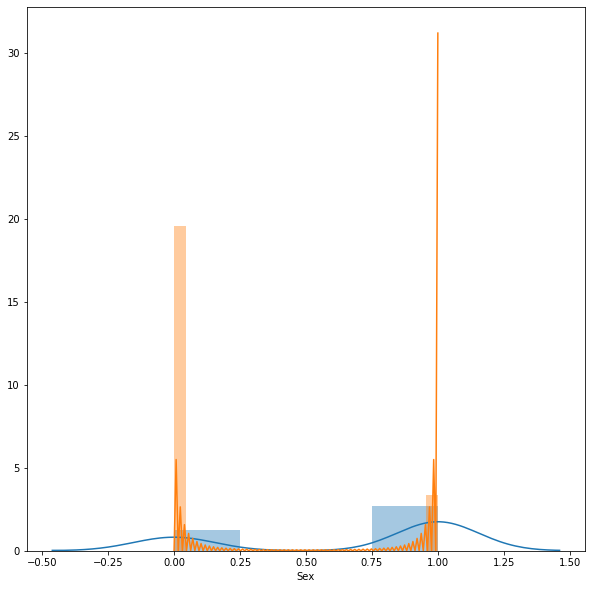

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'])
sns.distplot(df_bin.loc[df_bin['Survived'] ==0]['Sex'])

In [35]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

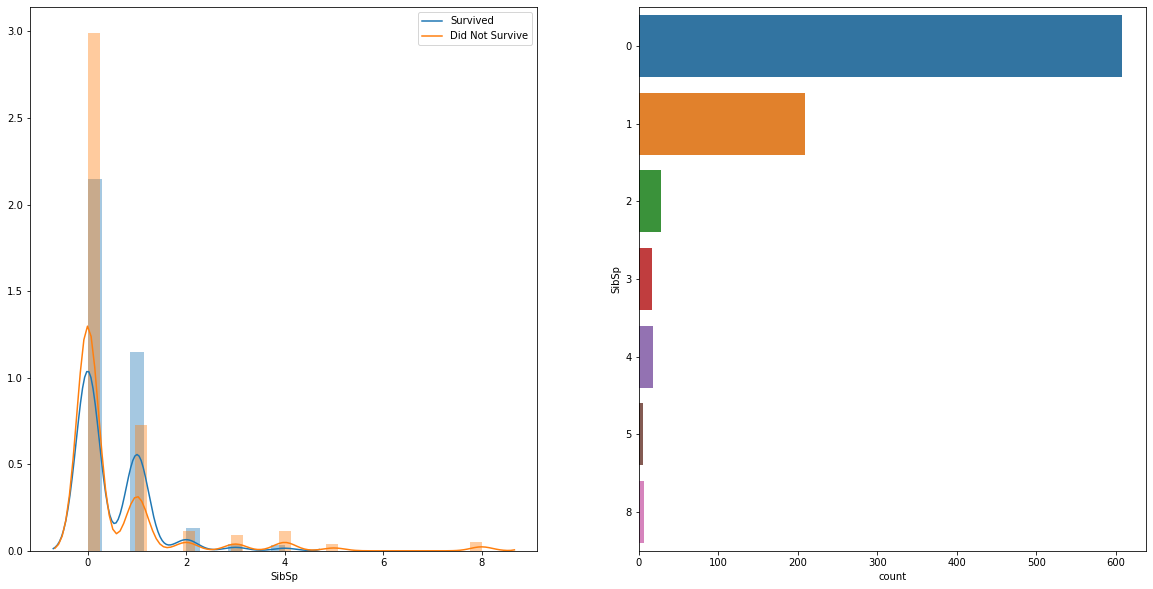

In [43]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df_bin.loc[df_bin['Survived']==1]['SibSp'],kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] ==0]['SibSp'],kde_kws={'label': 'Did Not Survive'})
plt.subplot(1,2,2)
sns.countplot(y='SibSp', data=train)

In [45]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

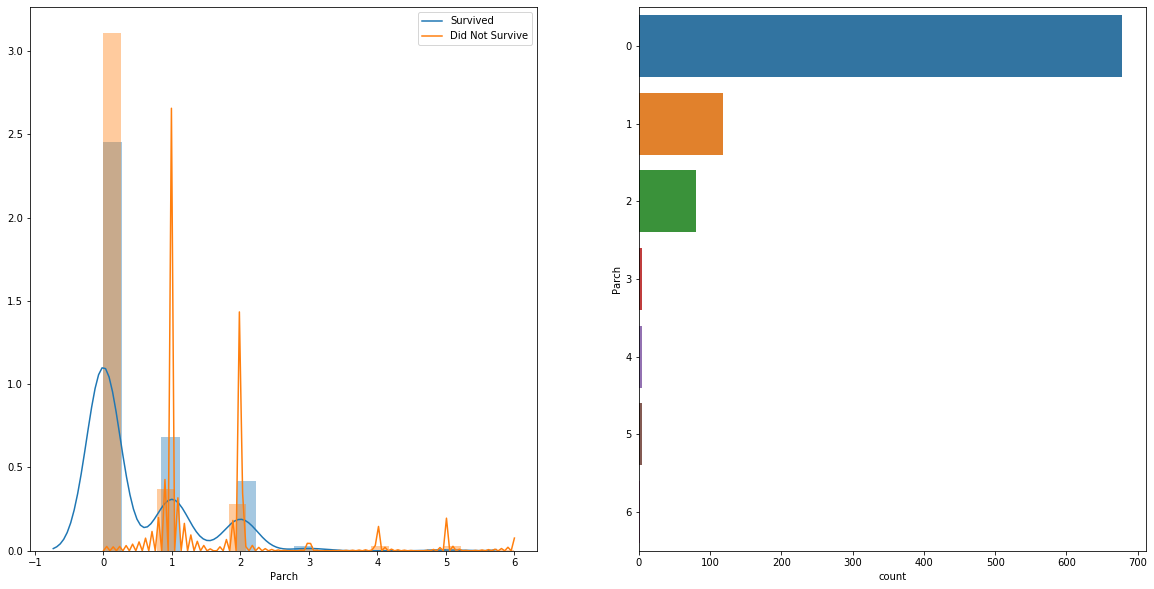

In [46]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Parch'],kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] ==0]['Parch'],kde_kws={'label': 'Did Not Survive'})
plt.subplot(1,2,2)
sns.countplot(y='Parch', data=train)

In [47]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


In [48]:
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.cut(train['Fare'],bins=5)

In [49]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
E101           3
              ..
C148           1
D6             1
A31            1
C62 C64        1
B71            1
Name: Cabin, Length: 147, dtype: int64

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


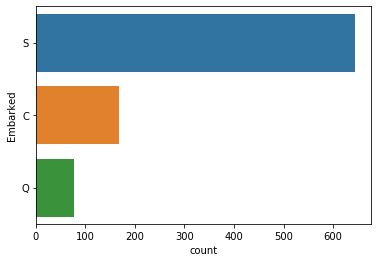

In [53]:
sns.countplot(y='Embarked',data=train)

In [54]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']
df_bin = df_bin.dropna(subset=['Embarked'])
df_con = df_con.dropna(subset=['Embarked'])

In [55]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [56]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [57]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()


,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [58]:
df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


In [59]:
selected_df = df_con_enc
x_train = selected_df.drop('Survived',axis=1)
y_train = selected_df.Survived

In [60]:
x_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,1,0,18,2
1,0,0,1,0,207,0
2,2,0,0,0,41,2
3,0,0,1,0,189,2
4,2,1,0,0,43,2


In [68]:
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

def fit_ml_algo(algo,x_train,y_train,CV):
    model = algo.fit(x_train,y_train)
    acc = round(model.score(x_train,y_train)*100,2)
    train_pred = model_selection.cross_val_predict(algo,x_train,y_train,cv=CV,n_jobs=-1)
    acc_cv = round(metrics.accuracy_score(y_train,train_pred)*100,2) 
    return train_pred,acc,acc_cv

### Logistic Regression

In [70]:
train_pre_log,acc_log,acc_cv_log = fit_ml_algo(LogisticRegression(),x_train,y_train,10)

print("accuracy is %s"%acc_log)
print("10 fold accuracy %s"%acc_cv_log)

accuracy is 79.08
10 fold accuracy 78.52


/Users/pavankumar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### KNN Classifier

In [72]:
train_pre_log,acc_log,acc_cv_log = fit_ml_algo(KNeighborsClassifier(),x_train,y_train,10)

print("accuracy is %s"%acc_log)
print("10 fold accuracy %s"%acc_cv_log)

accuracy is 81.44
10 fold accuracy 73.68


### Gaussian Naive Bayes

In [74]:
train_pre_log,acc_log,acc_cv_log = fit_ml_algo(GaussianNB(),x_train,y_train,10)

print("accuracy is %s"%acc_log)
print("10 fold accuracy %s"%acc_cv_log)

accuracy is 76.72
10 fold accuracy 76.38


### Linear SVC

In [75]:
train_pre_log,acc_log,acc_cv_log = fit_ml_algo(LinearSVC(),x_train,y_train,10)

print("accuracy is %s"%acc_log)
print("10 fold accuracy %s"%acc_cv_log)

/Users/pavankumar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy is 64.0
10 fold accuracy 68.5


### Stocastic Gradient Descent

In [78]:
train_pre_log,acc_log,acc_cv_log = fit_ml_algo(SGDClassifier(),x_train,y_train,10)

print("accuracy is %s"%acc_log)
print("10 fold accuracy %s"%acc_cv_log)

accuracy is 61.75
10 fold accuracy 60.29


### Decision Tree Classifier

In [79]:
train_pre_log,acc_log,acc_cv_log = fit_ml_algo(DecisionTreeClassifier(),x_train,y_train,10)

print("accuracy is %s"%acc_log)
print("10 fold accuracy %s"%acc_cv_log)

accuracy is 92.46
10 fold accuracy 79.53


### Gradient Boost Trees

In [80]:
train_pre_log,acc_log,acc_cv_log = fit_ml_algo(GradientBoostingClassifier(),x_train,y_train,10)

print("accuracy is %s"%acc_log)
print("10 fold accuracy %s"%acc_cv_log)

accuracy is 86.39
10 fold accuracy 81.1


### Cat Boost

In [81]:
x_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,1,0,18,2
1,0,0,1,0,207,0
2,2,0,0,0,41,2
3,0,0,1,0,189,2
4,2,1,0,0,43,2


In [82]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [83]:
cat_features = np.where(x_train.dtypes != np.float)[0]

In [84]:
cat_features

array([0, 1, 2, 3, 4, 5])

In [85]:
train_pool = Pool(x_train,y_train,cat_features)

In [86]:
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')
catboost_model.fit(train_pool,plot=True)
acc_catboost = round(catboost_model.score(x_train,y_train)*100,2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.016206
0:	learn: 0.6836288	total: 84.6ms	remaining: 1m 24s
1:	learn: 0.6741557	total: 99ms	remaining: 49.4s
2:	learn: 0.6652631	total: 112ms	remaining: 37.1s
3:	learn: 0.6572270	total: 118ms	remaining: 29.3s
4:	learn: 0.6498100	total: 123ms	remaining: 24.4s
5:	learn: 0.6423220	total: 126ms	remaining: 20.8s
6:	learn: 0.6352824	total: 137ms	remaining: 19.5s
7:	learn: 0.6280154	total: 145ms	remaining: 18s
8:	learn: 0.6218376	total: 149ms	remaining: 16.4s
9:	learn: 0.6152447	total: 155ms	remaining: 15.3s
10:	learn: 0.6085748	total: 161ms	remaining: 14.5s
11:	learn: 0.6020143	total: 167ms	remaining: 13.7s
12:	learn: 0.5961340	total: 174ms	remaining: 13.2s
13:	learn: 0.5894044	total: 178ms	remaining: 12.6s
14:	learn: 0.5837823	total: 184ms	remaining: 12.1s
15:	learn: 0.5781365	total: 189ms	remaining: 11.6s
16:	learn: 0.5729402	total: 194ms	remaining: 11.2s
17:	learn: 0.5679188	total: 199ms	remaining: 10.8s
18:	learn: 0.5624644	total: 205ms	remaining: 10.6s
19:	learn: 0

197:	learn: 0.3790257	total: 1.16s	remaining: 4.7s
198:	learn: 0.3784544	total: 1.16s	remaining: 4.69s
199:	learn: 0.3782042	total: 1.17s	remaining: 4.68s
200:	learn: 0.3781808	total: 1.17s	remaining: 4.66s
201:	learn: 0.3778757	total: 1.18s	remaining: 4.65s
202:	learn: 0.3776495	total: 1.18s	remaining: 4.64s
203:	learn: 0.3773005	total: 1.19s	remaining: 4.63s
204:	learn: 0.3768863	total: 1.19s	remaining: 4.62s
205:	learn: 0.3763865	total: 1.2s	remaining: 4.62s
206:	learn: 0.3758385	total: 1.2s	remaining: 4.61s
207:	learn: 0.3756592	total: 1.21s	remaining: 4.6s
208:	learn: 0.3754910	total: 1.21s	remaining: 4.59s
209:	learn: 0.3753085	total: 1.22s	remaining: 4.58s
210:	learn: 0.3751226	total: 1.22s	remaining: 4.58s
211:	learn: 0.3749925	total: 1.23s	remaining: 4.57s
212:	learn: 0.3749397	total: 1.23s	remaining: 4.55s
213:	learn: 0.3748778	total: 1.24s	remaining: 4.54s
214:	learn: 0.3746632	total: 1.24s	remaining: 4.54s
215:	learn: 0.3744074	total: 1.25s	remaining: 4.53s
216:	learn: 0.37

360:	learn: 0.3462083	total: 1.94s	remaining: 3.43s
361:	learn: 0.3461538	total: 1.94s	remaining: 3.42s
362:	learn: 0.3458971	total: 1.95s	remaining: 3.42s
363:	learn: 0.3458395	total: 1.95s	remaining: 3.41s
364:	learn: 0.3457530	total: 1.96s	remaining: 3.4s
365:	learn: 0.3455460	total: 1.96s	remaining: 3.4s
366:	learn: 0.3453718	total: 1.97s	remaining: 3.39s
367:	learn: 0.3453099	total: 1.97s	remaining: 3.39s
368:	learn: 0.3453098	total: 1.98s	remaining: 3.38s
369:	learn: 0.3451827	total: 1.98s	remaining: 3.37s
370:	learn: 0.3450207	total: 1.98s	remaining: 3.36s
371:	learn: 0.3449144	total: 1.99s	remaining: 3.36s
372:	learn: 0.3449048	total: 1.99s	remaining: 3.35s
373:	learn: 0.3448608	total: 2s	remaining: 3.34s
374:	learn: 0.3445900	total: 2s	remaining: 3.33s
375:	learn: 0.3443804	total: 2s	remaining: 3.32s
376:	learn: 0.3443039	total: 2.01s	remaining: 3.32s
377:	learn: 0.3437201	total: 2.01s	remaining: 3.31s
378:	learn: 0.3433631	total: 2.01s	remaining: 3.3s
379:	learn: 0.3433584	to

542:	learn: 0.3165070	total: 2.9s	remaining: 2.44s
543:	learn: 0.3164771	total: 2.9s	remaining: 2.44s
544:	learn: 0.3164189	total: 2.91s	remaining: 2.43s
545:	learn: 0.3162926	total: 2.92s	remaining: 2.42s
546:	learn: 0.3162118	total: 2.92s	remaining: 2.42s
547:	learn: 0.3161186	total: 2.93s	remaining: 2.41s
548:	learn: 0.3159899	total: 2.93s	remaining: 2.41s
549:	learn: 0.3158755	total: 2.94s	remaining: 2.4s
550:	learn: 0.3157718	total: 2.95s	remaining: 2.4s
551:	learn: 0.3157321	total: 2.96s	remaining: 2.4s
552:	learn: 0.3156270	total: 2.96s	remaining: 2.39s
553:	learn: 0.3155377	total: 2.97s	remaining: 2.39s
554:	learn: 0.3154986	total: 2.97s	remaining: 2.38s
555:	learn: 0.3153139	total: 2.98s	remaining: 2.38s
556:	learn: 0.3152994	total: 2.98s	remaining: 2.37s
557:	learn: 0.3152781	total: 2.99s	remaining: 2.37s
558:	learn: 0.3152399	total: 2.99s	remaining: 2.36s
559:	learn: 0.3149385	total: 3s	remaining: 2.36s
560:	learn: 0.3146828	total: 3s	remaining: 2.35s
561:	learn: 0.3145564	t

715:	learn: 0.2913129	total: 3.67s	remaining: 1.46s
716:	learn: 0.2911632	total: 3.67s	remaining: 1.45s
717:	learn: 0.2911001	total: 3.68s	remaining: 1.45s
718:	learn: 0.2909432	total: 3.69s	remaining: 1.44s
719:	learn: 0.2908481	total: 3.69s	remaining: 1.44s
720:	learn: 0.2907692	total: 3.69s	remaining: 1.43s
721:	learn: 0.2907460	total: 3.7s	remaining: 1.42s
722:	learn: 0.2906536	total: 3.7s	remaining: 1.42s
723:	learn: 0.2905489	total: 3.71s	remaining: 1.41s
724:	learn: 0.2904387	total: 3.71s	remaining: 1.41s
725:	learn: 0.2903930	total: 3.71s	remaining: 1.4s
726:	learn: 0.2903325	total: 3.72s	remaining: 1.4s
727:	learn: 0.2901474	total: 3.72s	remaining: 1.39s
728:	learn: 0.2900921	total: 3.73s	remaining: 1.39s
729:	learn: 0.2900558	total: 3.73s	remaining: 1.38s
730:	learn: 0.2899727	total: 3.73s	remaining: 1.37s
731:	learn: 0.2897005	total: 3.74s	remaining: 1.37s
732:	learn: 0.2894428	total: 3.74s	remaining: 1.36s
733:	learn: 0.2892535	total: 3.75s	remaining: 1.36s
734:	learn: 0.28

889:	learn: 0.2698607	total: 4.43s	remaining: 548ms
890:	learn: 0.2696992	total: 4.44s	remaining: 543ms
891:	learn: 0.2695858	total: 4.44s	remaining: 538ms
892:	learn: 0.2693257	total: 4.45s	remaining: 533ms
893:	learn: 0.2691878	total: 4.45s	remaining: 528ms
894:	learn: 0.2689956	total: 4.46s	remaining: 523ms
895:	learn: 0.2689720	total: 4.46s	remaining: 518ms
896:	learn: 0.2687573	total: 4.47s	remaining: 513ms
897:	learn: 0.2687120	total: 4.47s	remaining: 508ms
898:	learn: 0.2686153	total: 4.48s	remaining: 503ms
899:	learn: 0.2685586	total: 4.48s	remaining: 498ms
900:	learn: 0.2685315	total: 4.48s	remaining: 493ms
901:	learn: 0.2684835	total: 4.49s	remaining: 488ms
902:	learn: 0.2682208	total: 4.49s	remaining: 483ms
903:	learn: 0.2681537	total: 4.5s	remaining: 477ms
904:	learn: 0.2680668	total: 4.5s	remaining: 472ms
905:	learn: 0.2679116	total: 4.5s	remaining: 467ms
906:	learn: 0.2677795	total: 4.51s	remaining: 462ms
907:	learn: 0.2677342	total: 4.51s	remaining: 457ms
908:	learn: 0.2

In [87]:
acc_catboost

88.08

In [88]:
cv_params = catboost_model.get_params()
cv_data = cv(train_pool,cv_params,fold_count=10,plot=True)
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean'])*100,2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6767627	test: 0.6766954	best: 0.6766954 (0)	total: 162ms	remaining: 2m 41s
1:	learn: 0.6602797	test: 0.6611644	best: 0.6611644 (1)	total: 262ms	remaining: 2m 10s
2:	learn: 0.6461426	test: 0.6473387	best: 0.6473387 (2)	total: 345ms	remaining: 1m 54s
3:	learn: 0.6322198	test: 0.6333777	best: 0.6333777 (3)	total: 416ms	remaining: 1m 43s
4:	learn: 0.6187652	test: 0.6204735	best: 0.6204735 (4)	total: 522ms	remaining: 1m 43s
5:	learn: 0.6057490	test: 0.6080836	best: 0.6080836 (5)	total: 637ms	remaining: 1m 45s
6:	learn: 0.5939918	test: 0.5971687	best: 0.5971687 (6)	total: 751ms	remaining: 1m 46s
7:	learn: 0.5844453	test: 0.5876274	best: 0.5876274 (7)	total: 834ms	remaining: 1m 43s
8:	learn: 0.5746543	test: 0.5782084	best: 0.5782084 (8)	total: 932ms	remaining: 1m 42s
9:	learn: 0.5651383	test: 0.5689412	best: 0.5689412 (9)	total: 1.02s	remaining: 1m 41s
10:	learn: 0.5558030	test: 0.5600828	best: 0.5600828 (10)	total: 1.11s	remaining: 1m 40s
11:	learn: 0.5473244	test: 0.5525076	best

93:	learn: 0.3810893	test: 0.4299179	best: 0.4299179 (93)	total: 8.51s	remaining: 1m 22s
94:	learn: 0.3803108	test: 0.4297694	best: 0.4297694 (94)	total: 8.6s	remaining: 1m 21s
95:	learn: 0.3797224	test: 0.4296040	best: 0.4296040 (95)	total: 8.69s	remaining: 1m 21s
96:	learn: 0.3792656	test: 0.4293975	best: 0.4293975 (96)	total: 8.77s	remaining: 1m 21s
97:	learn: 0.3787074	test: 0.4293516	best: 0.4293516 (97)	total: 8.84s	remaining: 1m 21s
98:	learn: 0.3782056	test: 0.4292734	best: 0.4292734 (98)	total: 8.91s	remaining: 1m 21s
99:	learn: 0.3775557	test: 0.4289433	best: 0.4289433 (99)	total: 8.98s	remaining: 1m 20s
100:	learn: 0.3770570	test: 0.4287941	best: 0.4287941 (100)	total: 9.09s	remaining: 1m 20s
101:	learn: 0.3764563	test: 0.4288278	best: 0.4287941 (100)	total: 9.16s	remaining: 1m 20s
102:	learn: 0.3760781	test: 0.4287019	best: 0.4287019 (102)	total: 9.24s	remaining: 1m 20s
103:	learn: 0.3754684	test: 0.4286907	best: 0.4286907 (103)	total: 9.33s	remaining: 1m 20s
104:	learn: 0.

184:	learn: 0.3431367	test: 0.4291675	best: 0.4278102 (111)	total: 16.1s	remaining: 1m 11s
185:	learn: 0.3427323	test: 0.4292241	best: 0.4278102 (111)	total: 16.2s	remaining: 1m 10s
186:	learn: 0.3422663	test: 0.4293958	best: 0.4278102 (111)	total: 16.3s	remaining: 1m 10s
187:	learn: 0.3419118	test: 0.4294423	best: 0.4278102 (111)	total: 16.6s	remaining: 1m 11s
188:	learn: 0.3415835	test: 0.4293502	best: 0.4278102 (111)	total: 16.7s	remaining: 1m 11s
189:	learn: 0.3411472	test: 0.4293147	best: 0.4278102 (111)	total: 16.8s	remaining: 1m 11s
190:	learn: 0.3408893	test: 0.4293199	best: 0.4278102 (111)	total: 16.9s	remaining: 1m 11s
191:	learn: 0.3405227	test: 0.4291773	best: 0.4278102 (111)	total: 17s	remaining: 1m 11s
192:	learn: 0.3402027	test: 0.4292649	best: 0.4278102 (111)	total: 17.1s	remaining: 1m 11s
193:	learn: 0.3399736	test: 0.4294070	best: 0.4278102 (111)	total: 17.2s	remaining: 1m 11s
194:	learn: 0.3396979	test: 0.4294996	best: 0.4278102 (111)	total: 17.3s	remaining: 1m 11s
1

276:	learn: 0.3155765	test: 0.4308062	best: 0.4278102 (111)	total: 24.9s	remaining: 1m 4s
277:	learn: 0.3153954	test: 0.4307461	best: 0.4278102 (111)	total: 25s	remaining: 1m 4s
278:	learn: 0.3150773	test: 0.4307409	best: 0.4278102 (111)	total: 25.1s	remaining: 1m 4s
279:	learn: 0.3147769	test: 0.4307183	best: 0.4278102 (111)	total: 25.1s	remaining: 1m 4s
280:	learn: 0.3144538	test: 0.4308314	best: 0.4278102 (111)	total: 25.2s	remaining: 1m 4s
281:	learn: 0.3142012	test: 0.4310823	best: 0.4278102 (111)	total: 25.4s	remaining: 1m 4s
282:	learn: 0.3140065	test: 0.4311917	best: 0.4278102 (111)	total: 25.4s	remaining: 1m 4s
283:	learn: 0.3138270	test: 0.4312607	best: 0.4278102 (111)	total: 25.5s	remaining: 1m 4s
284:	learn: 0.3135465	test: 0.4312613	best: 0.4278102 (111)	total: 25.6s	remaining: 1m 4s
285:	learn: 0.3133062	test: 0.4312527	best: 0.4278102 (111)	total: 25.7s	remaining: 1m 4s
286:	learn: 0.3129081	test: 0.4314859	best: 0.4278102 (111)	total: 25.7s	remaining: 1m 3s
287:	learn: 

370:	learn: 0.2923780	test: 0.4351557	best: 0.4278102 (111)	total: 33s	remaining: 56s
371:	learn: 0.2921805	test: 0.4352096	best: 0.4278102 (111)	total: 33.1s	remaining: 56s
372:	learn: 0.2918954	test: 0.4351730	best: 0.4278102 (111)	total: 33.3s	remaining: 55.9s
373:	learn: 0.2916478	test: 0.4350357	best: 0.4278102 (111)	total: 33.3s	remaining: 55.8s
374:	learn: 0.2914553	test: 0.4350626	best: 0.4278102 (111)	total: 33.4s	remaining: 55.7s
375:	learn: 0.2912085	test: 0.4351810	best: 0.4278102 (111)	total: 33.5s	remaining: 55.6s
376:	learn: 0.2909719	test: 0.4353008	best: 0.4278102 (111)	total: 33.6s	remaining: 55.4s
377:	learn: 0.2907448	test: 0.4353467	best: 0.4278102 (111)	total: 33.6s	remaining: 55.3s
378:	learn: 0.2905346	test: 0.4354374	best: 0.4278102 (111)	total: 33.7s	remaining: 55.2s
379:	learn: 0.2902345	test: 0.4355349	best: 0.4278102 (111)	total: 33.8s	remaining: 55.1s
380:	learn: 0.2900285	test: 0.4355501	best: 0.4278102 (111)	total: 33.9s	remaining: 55s
381:	learn: 0.2897

462:	learn: 0.2707335	test: 0.4416091	best: 0.4278102 (111)	total: 41.4s	remaining: 48s
463:	learn: 0.2705510	test: 0.4415432	best: 0.4278102 (111)	total: 41.5s	remaining: 48s
464:	learn: 0.2703034	test: 0.4416912	best: 0.4278102 (111)	total: 41.6s	remaining: 47.9s
465:	learn: 0.2699889	test: 0.4417254	best: 0.4278102 (111)	total: 41.8s	remaining: 47.8s
466:	learn: 0.2697016	test: 0.4416452	best: 0.4278102 (111)	total: 41.8s	remaining: 47.8s
467:	learn: 0.2695135	test: 0.4417364	best: 0.4278102 (111)	total: 41.9s	remaining: 47.7s
468:	learn: 0.2692757	test: 0.4418242	best: 0.4278102 (111)	total: 42s	remaining: 47.6s
469:	learn: 0.2690763	test: 0.4420996	best: 0.4278102 (111)	total: 42.1s	remaining: 47.5s
470:	learn: 0.2688677	test: 0.4422149	best: 0.4278102 (111)	total: 42.2s	remaining: 47.4s
471:	learn: 0.2686671	test: 0.4421676	best: 0.4278102 (111)	total: 42.3s	remaining: 47.3s
472:	learn: 0.2684341	test: 0.4422082	best: 0.4278102 (111)	total: 42.7s	remaining: 47.5s
473:	learn: 0.26

555:	learn: 0.2515985	test: 0.4468682	best: 0.4278102 (111)	total: 51.3s	remaining: 41s
556:	learn: 0.2514189	test: 0.4470129	best: 0.4278102 (111)	total: 51.4s	remaining: 40.9s
557:	learn: 0.2512337	test: 0.4469188	best: 0.4278102 (111)	total: 51.5s	remaining: 40.8s
558:	learn: 0.2510695	test: 0.4469713	best: 0.4278102 (111)	total: 51.6s	remaining: 40.7s
559:	learn: 0.2508760	test: 0.4469214	best: 0.4278102 (111)	total: 51.7s	remaining: 40.6s
560:	learn: 0.2507359	test: 0.4469869	best: 0.4278102 (111)	total: 51.8s	remaining: 40.5s
561:	learn: 0.2505972	test: 0.4470210	best: 0.4278102 (111)	total: 51.8s	remaining: 40.4s
562:	learn: 0.2504229	test: 0.4471662	best: 0.4278102 (111)	total: 52s	remaining: 40.4s
563:	learn: 0.2502047	test: 0.4471166	best: 0.4278102 (111)	total: 52.1s	remaining: 40.3s
564:	learn: 0.2500191	test: 0.4471696	best: 0.4278102 (111)	total: 52.2s	remaining: 40.2s
565:	learn: 0.2498945	test: 0.4471929	best: 0.4278102 (111)	total: 52.6s	remaining: 40.3s
566:	learn: 0.

647:	learn: 0.2349650	test: 0.4518030	best: 0.4278102 (111)	total: 1m 2s	remaining: 33.7s
648:	learn: 0.2348079	test: 0.4519270	best: 0.4278102 (111)	total: 1m 2s	remaining: 33.6s
649:	learn: 0.2346191	test: 0.4519762	best: 0.4278102 (111)	total: 1m 2s	remaining: 33.5s
650:	learn: 0.2344376	test: 0.4522570	best: 0.4278102 (111)	total: 1m 2s	remaining: 33.4s
651:	learn: 0.2341911	test: 0.4520990	best: 0.4278102 (111)	total: 1m 2s	remaining: 33.3s
652:	learn: 0.2340342	test: 0.4521152	best: 0.4278102 (111)	total: 1m 2s	remaining: 33.2s
653:	learn: 0.2338785	test: 0.4520352	best: 0.4278102 (111)	total: 1m 2s	remaining: 33.3s
654:	learn: 0.2337312	test: 0.4520568	best: 0.4278102 (111)	total: 1m 3s	remaining: 33.2s
655:	learn: 0.2335506	test: 0.4520703	best: 0.4278102 (111)	total: 1m 3s	remaining: 33.1s
656:	learn: 0.2334268	test: 0.4520962	best: 0.4278102 (111)	total: 1m 3s	remaining: 33s
657:	learn: 0.2332677	test: 0.4521225	best: 0.4278102 (111)	total: 1m 3s	remaining: 32.9s
658:	learn: 

740:	learn: 0.2193528	test: 0.4550845	best: 0.4278102 (111)	total: 1m 12s	remaining: 25.3s
741:	learn: 0.2191610	test: 0.4552690	best: 0.4278102 (111)	total: 1m 12s	remaining: 25.2s
742:	learn: 0.2190157	test: 0.4553572	best: 0.4278102 (111)	total: 1m 12s	remaining: 25.1s
743:	learn: 0.2188571	test: 0.4553452	best: 0.4278102 (111)	total: 1m 12s	remaining: 25s
744:	learn: 0.2186973	test: 0.4555171	best: 0.4278102 (111)	total: 1m 12s	remaining: 24.9s
745:	learn: 0.2184959	test: 0.4558178	best: 0.4278102 (111)	total: 1m 12s	remaining: 24.8s
746:	learn: 0.2183096	test: 0.4558719	best: 0.4278102 (111)	total: 1m 12s	remaining: 24.7s
747:	learn: 0.2181489	test: 0.4558435	best: 0.4278102 (111)	total: 1m 13s	remaining: 24.6s
748:	learn: 0.2179814	test: 0.4559316	best: 0.4278102 (111)	total: 1m 13s	remaining: 24.5s
749:	learn: 0.2177823	test: 0.4558605	best: 0.4278102 (111)	total: 1m 13s	remaining: 24.4s
750:	learn: 0.2176377	test: 0.4558996	best: 0.4278102 (111)	total: 1m 13s	remaining: 24.3s
7

832:	learn: 0.2056258	test: 0.4600382	best: 0.4278102 (111)	total: 1m 23s	remaining: 16.7s
833:	learn: 0.2055103	test: 0.4600888	best: 0.4278102 (111)	total: 1m 23s	remaining: 16.6s
834:	learn: 0.2053646	test: 0.4600722	best: 0.4278102 (111)	total: 1m 23s	remaining: 16.5s
835:	learn: 0.2052348	test: 0.4601523	best: 0.4278102 (111)	total: 1m 23s	remaining: 16.4s
836:	learn: 0.2051187	test: 0.4601022	best: 0.4278102 (111)	total: 1m 23s	remaining: 16.3s
837:	learn: 0.2049981	test: 0.4600746	best: 0.4278102 (111)	total: 1m 24s	remaining: 16.3s
838:	learn: 0.2048719	test: 0.4600374	best: 0.4278102 (111)	total: 1m 24s	remaining: 16.2s
839:	learn: 0.2047426	test: 0.4600676	best: 0.4278102 (111)	total: 1m 24s	remaining: 16.1s
840:	learn: 0.2046090	test: 0.4601075	best: 0.4278102 (111)	total: 1m 24s	remaining: 15.9s
841:	learn: 0.2044628	test: 0.4601882	best: 0.4278102 (111)	total: 1m 24s	remaining: 15.8s
842:	learn: 0.2043327	test: 0.4601871	best: 0.4278102 (111)	total: 1m 24s	remaining: 15.7s

925:	learn: 0.1935406	test: 0.4648922	best: 0.4278102 (111)	total: 1m 34s	remaining: 7.55s
926:	learn: 0.1934477	test: 0.4649450	best: 0.4278102 (111)	total: 1m 34s	remaining: 7.45s
927:	learn: 0.1933052	test: 0.4650011	best: 0.4278102 (111)	total: 1m 34s	remaining: 7.35s
928:	learn: 0.1931828	test: 0.4649597	best: 0.4278102 (111)	total: 1m 35s	remaining: 7.28s
929:	learn: 0.1930762	test: 0.4651251	best: 0.4278102 (111)	total: 1m 35s	remaining: 7.17s
930:	learn: 0.1929825	test: 0.4651883	best: 0.4278102 (111)	total: 1m 35s	remaining: 7.07s
931:	learn: 0.1928810	test: 0.4651152	best: 0.4278102 (111)	total: 1m 35s	remaining: 6.96s
932:	learn: 0.1927463	test: 0.4652991	best: 0.4278102 (111)	total: 1m 35s	remaining: 6.86s
933:	learn: 0.1926130	test: 0.4652031	best: 0.4278102 (111)	total: 1m 35s	remaining: 6.75s
934:	learn: 0.1924657	test: 0.4652759	best: 0.4278102 (111)	total: 1m 35s	remaining: 6.65s
935:	learn: 0.1923748	test: 0.4652783	best: 0.4278102 (111)	total: 1m 35s	remaining: 6.55s

In [89]:
acc_cv_catboost

81.66

In [90]:
catboost_model.feature_importances_

array([19.07502007, 22.13617313, 11.60620239, 14.19062122, 20.14995318,
       12.84203   ])

In [93]:
catboost_model.feature_names_

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [101]:
fea_imp = pd.DataFrame(data = {'imp':catboost_model.feature_importances_,'names':catboost_model.feature_names_})
fea_imp

,imp,names
0,19.075020,Pclass
1,22.136173,Sex
2,11.606202,SibSp
3,14.190621,Parch
4,20.149953,Fare
5,12.842030,Embarked


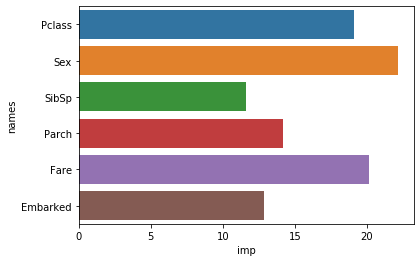

In [106]:
sns.barplot(x='imp',y='names',data=fea_imp)

In [107]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8944409443958583
Recall: 0.7344058823529411
F1: 0.8061951495547428
AUC: 0.9174799394621236


In [108]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
wanted_test_columns = x_train.columns
final_test = test[wanted_test_columns].apply(LabelEncoder().fit_transform)
final_test.head()


,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,0,0,24,1
1,2,0,1,0,5,2
2,1,1,0,0,41,1
3,2,1,0,0,34,2
4,2,0,1,1,46,2


In [111]:
predictions = catboost_model.predict(final_test)

In [112]:
predictions[:20]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0.])

In [114]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [115]:
submission['Survived'] = submission['Survived'].astype(int)

In [116]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [117]:
submission.to_csv('catboost_submission.csv',index=False)

In [118]:
pd.read_csv('catboost_submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
